In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# load the clean dataset 
school_df = pd.read_csv("dataset/merged_clean_data.csv")

In [3]:
school_df.head()

,index,District,Zone,Development Region,Geographical Region,Latitude,Longitude,School_code,School_name,ENGLISH,...,HEALTH POPULATION AND ENVIRONMENT,TAP,SAP,DISTINCTION,FIRST DIVISION,SECOND DIVISION,THIRD DIVISION,PASS,FAIL,PASS PERCENT
0,0,taplejung,Mechi,Eastern,Mountain,27.35,87.666667,1001,BALSUBODHINI SAN MA VI MEDIBUNG PHUNGLIN,16.2,...,33.1,60,60,0,2,7,0,9,51,15.0
1,1,taplejung,Mechi,Eastern,Mountain,27.35,87.666667,1002,BHANUJAN MA VI AMBITAR,17.3,...,39.2,116,115,0,5,16,0,21,94,18.3
2,2,taplejung,Mechi,Eastern,Mountain,27.35,87.666667,1003,MOTI MA VI KHOKLING,16.2,...,42.4,30,30,0,0,2,0,2,28,6.7
3,3,taplejung,Mechi,Eastern,Mountain,27.35,87.666667,1004,SINAM MA VI SINAM,28.7,...,48.2,76,75,0,12,46,0,58,17,77.3
4,4,taplejung,Mechi,Eastern,Mountain,27.35,87.666667,1005,GANESH MA VI KHEWANG,23.3,...,35.0,27,27,0,2,7,0,9,18,33.3


In [4]:
# find the no. of school in each district
no_school_each_district = school_df.groupby('District').size()

In [5]:
# show no. of schools in each district
no_school_each_district


District
achham           40
arghakhanchi     54
baglung          78
baitadi          52
bajhang          37
               ... 
syangja         108
tanahun         105
taplejung        36
terhathum        33
udayapur         59
Length: 75, dtype: int64

In [6]:
# average pass percentage of student in each district
avg_pass_std = school_df.groupby(by=['District'])['PASS PERCENT'].agg([np.average])

In [7]:
school_df.columns

Index(['index', 'District', 'Zone', 'Development Region',
       'Geographical Region', 'Latitude', 'Longitude', 'School_code',
       'School_name', 'ENGLISH', 'NEPALI', 'MATHS', 'SCIENCE',
       'SOCIAL STUDIES', 'HEALTH POPULATION AND ENVIRONMENT', 'TAP', 'SAP',
       'DISTINCTION', 'FIRST DIVISION', 'SECOND DIVISION', 'THIRD DIVISION',
       'PASS', 'FAIL', 'PASS PERCENT'],
      dtype='object')

In [8]:
avg_pass_std.head()

,average
District,
achham,53.615000
arghakhanchi,60.431481
baglung,41.065385
baitadi,49.713462
bajhang,75.713514


In [9]:
# avg score of nepali subject in each zone 
avg_score_np_zone = school_df.groupby('Zone')['NEPALI'].agg([np.average])

In [10]:
# avg score of english subject in each zone 
avg_score_en_zone = school_df.groupby('Zone')['ENGLISH'].agg([np.average])

In [11]:
en_np_avg = pd.merge(avg_score_en_zone,avg_score_np_zone,on='Zone',how='inner')

In [12]:
en_np_avg.head()

,average_x,average_y
Zone,,
Bagmati,42.329647,55.832051
Bheri,26.969955,46.283857
Dhawalagiri,28.081538,45.738974
Gandaki,35.363842,49.304896
Janakpur,30.212742,47.532964


In [13]:
# Show the Different Geographical Region
school_df['Geographical Region'].unique()

array(['Mountain', 'Hill', 'Terai'], dtype=object)

In [14]:
# pass percentage variance in specific Geographical Region
hill_region = school_df[school_df['Geographical Region']=='Hill']

In [15]:
hill_region['PASS'].var(axis=0,numeric_only=True,ddof=0)

870.3856149838982

In [16]:
hill_region.head(2)

,index,District,Zone,Development Region,Geographical Region,Latitude,Longitude,School_code,School_name,ENGLISH,...,HEALTH POPULATION AND ENVIRONMENT,TAP,SAP,DISTINCTION,FIRST DIVISION,SECOND DIVISION,THIRD DIVISION,PASS,FAIL,PASS PERCENT
36,36,panchthar,Mechi,Eastern,Hill,27.2,87.83,2000,PRIVATE PANCHTHAR,21.8,...,39.8,97,92,0,1,7,8,16,76,17.4
37,37,panchthar,Mechi,Eastern,Hill,27.2,87.83,2001,PHIDIM MA VI PHIDIM,23.5,...,42.7,104,103,0,13,29,1,43,60,41.7


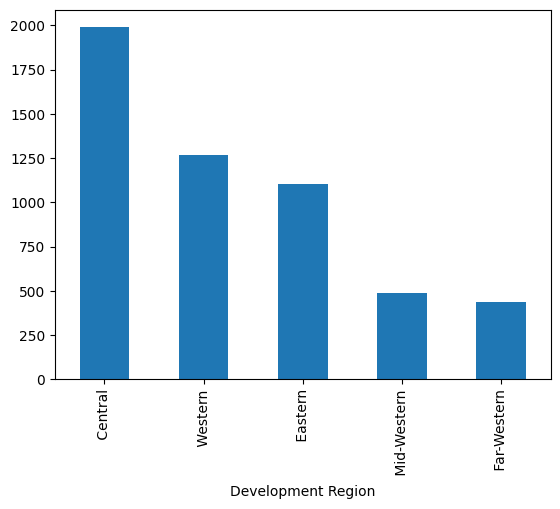

In [19]:
# How is the distribution of schools across different development regions?
school_df['Development Region'].value_counts().plot(kind='bar')
plt.show()

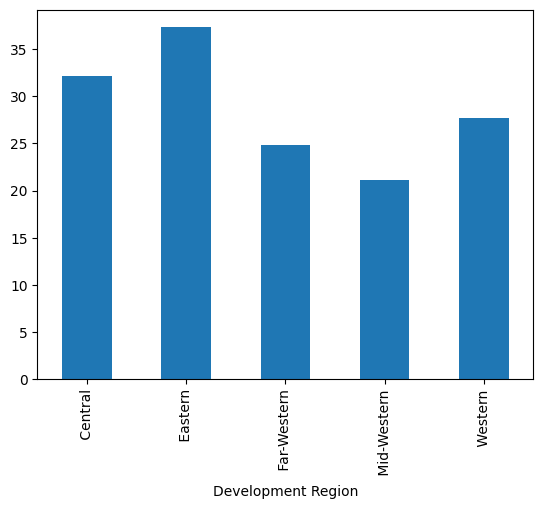

In [20]:
# What is the average number of students passing in the first division for each development region?
school_df.groupby('Development Region')['PASS'].mean().plot(kind='bar')
plt.show()

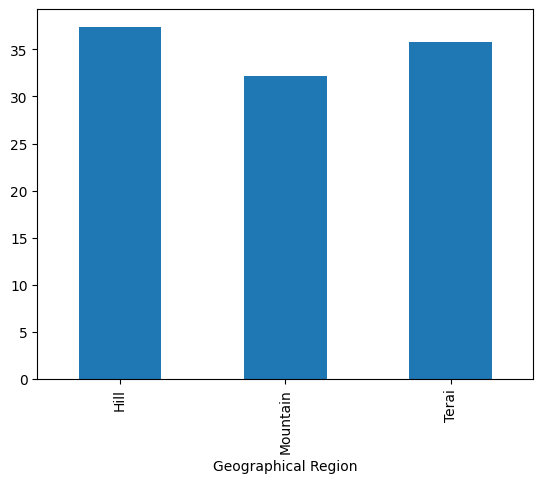

In [21]:
# Which geographical region has the highest pass percentage in Science?
school_df.groupby('Geographical Region')['SCIENCE'].mean().plot(kind='bar')
plt.show()

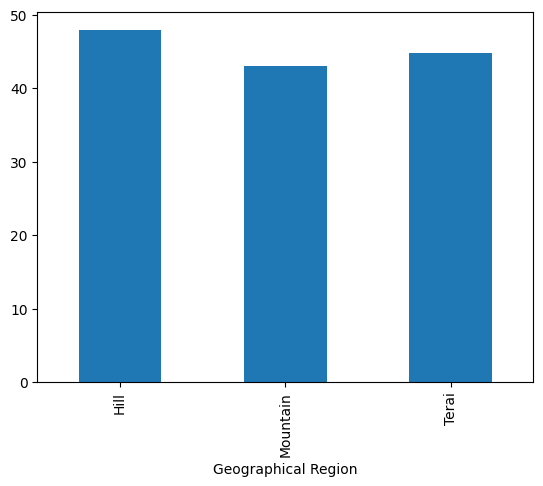

In [23]:
# How does the performance in Social Studies vary across different geographical regions?
school_df.groupby('Geographical Region')['SOCIAL STUDIES'].mean().plot(kind='bar')
plt.show()

In [26]:
# Which schools have consistently high performance across all subjects?
school_df['Total'] = school_df['ENGLISH'] + school_df['NEPALI'] + school_df['MATHS'] + school_df['SCIENCE'] + school_df['SOCIAL STUDIES']
school_df.iloc[ school_df['Total'].idxmax() ]


index                                                         3401
District                                                     kaski
Zone                                                       Gandaki
Development Region                                         Western
Geographical Region                                           Hill
Latitude                                                 28.333333
Longitude                                                     84.0
School_code                                         LEKHNATH KHUDI
School_name                          GOLDEN NATURE BOARDING SCHOOL
ENGLISH                                                       65.1
NEPALI                                                        78.3
MATHS                                                         95.4
SCIENCE                                                       64.3
SOCIAL STUDIES                                                77.4
HEALTH POPULATION AND ENVIRONMENT                             

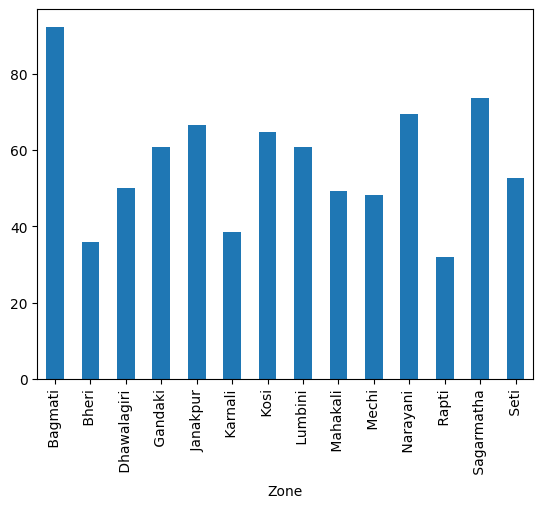

In [37]:
# What is the median pass percentage for each zone?
school_df.groupby('Zone')['PASS PERCENT'].median().plot(kind='bar')
plt.show()

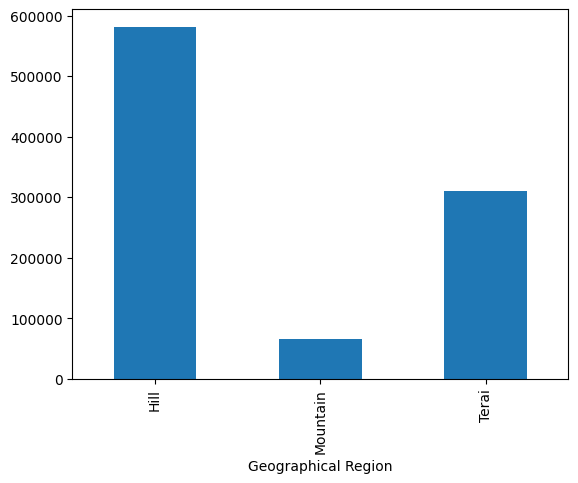

In [40]:
# Are there any geographical regions with a significant number of failing schools?
school_df['FAIL'] = school_df['Total'] - school_df['PASS']
school_df.groupby('Geographical Region')['FAIL'].sum().plot(kind='bar')
plt.show()

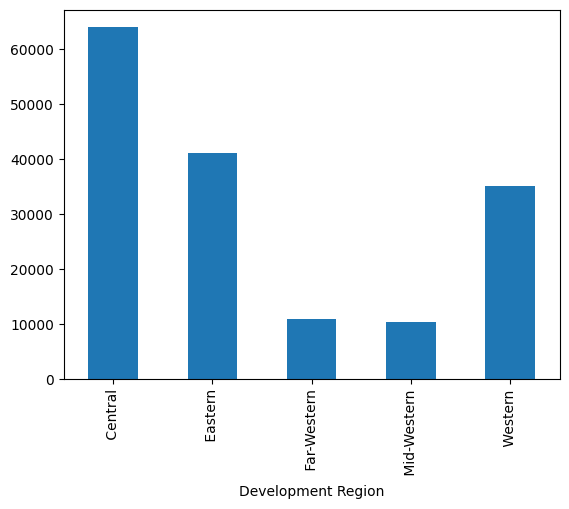

In [42]:
# What is the trend in the number of students achieving first division across different development regions?
school_df.groupby('Development Region')['PASS'].sum().plot(kind='bar')
plt.show()